In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import eli5
from eli5.sklearn import PermutationImportance
import pandas as pd
import shap 
from sklearn import preprocessing 


# Read the data
X_full = pd.read_csv("cleandata2.csv")
y = X_full["point_total"]

# Label / One-Hot encoding team IDs and season
le = preprocessing.OneHotEncoder()
le2 = preprocessing.LabelEncoder()
ohe_home = le.fit_transform(X_full[["HOME_TEAM_ID"]]).toarray()
ohe_away = le.transform(X_full[["VISITOR_TEAM_ID"]]).toarray()
seas = le2.fit_transform(X_full["SEASON"])
# Drop old columns
X_full = X_full.drop(columns =[
    "HOME_TEAM_ID","VISITOR_TEAM_ID",
    "GAME_DATE_EST", "PTS_home",
    "PTS_away","SEASON","point_total"], axis=1)

# Testing features:
X_full["diff"] = X_full.apply(lambda row: row.avgpointtotal_home - row.avgpointtotal_away, axis=1)
#X_full["diff"] = X_full["diff"].abs()
#X_full["multi"] = X_full.apply(lambda row: row.avgpointtotal_home / row.avgpointtotal_away, axis=1)


In [2]:
# Cols = all the columns that I want scaled 
cols = X_full.columns 
#cols = cols.drop("HOME_TEAM_ID_encoded")
#cols = cols.drop("VISITOR_TEAM_ID_encoded")
#cols = cols.drop("SEASON_encoded")
#cols = cols.drop("point_total")

In [3]:
# Scaling all of the columns
#for i in cols:
#    print (i)
#    X_full[i+"_scale"] = preprocessing.RobustScaler(
#        X_full[i]
#    )
transformer = preprocessing.MaxAbsScaler().fit(X_full)
X_full = transformer.transform(X_full)
X_full = pd.DataFrame(X_full, columns=cols)
print(X_full.head(10))
#X_full = preprocessing.RobustScaler(X_full)


   point_average_last10  point_againts_average_last10  \
0              0.808450                      0.876318   
1              0.952420                      0.998783   
2              0.956932                      0.886456   
3              0.921657                      0.888078   
4              0.924118                      0.912814   
5              0.990976                      0.951338   
6              0.885972                      0.959448   
7              0.864643                      0.893755   
8              0.969237                      0.992701   
9              0.941345                      0.910787   

   away_point_average_last10  away_point_againts_average_last10       cgp  \
0                   1.000000                           0.878986  0.719512   
1                   0.944763                           0.923140  0.707317   
2                   0.880115                           0.882257  0.719512   
3                   0.948854                           0.878168 

In [4]:
# Drop unscaled columns
#X_full= X_full.drop(cols,axis=1)

In [4]:
ohe_home_df = pd.DataFrame(ohe_home)
ohe_away_df = pd.DataFrame(ohe_away, columns=list("abcdefghijklmnopqrstuvwxyzABCD"))
X_full = pd.concat([X_full,ohe_home_df], axis=1)
X_full = pd.concat([X_full,ohe_away_df], axis=1)
print(X_full.shape)

(11915, 80)


In [5]:
X_full["SEASON_encoded"] = seas

In [18]:
print(X_full.columns)

Index([             'point_average_last10',
            'point_againts_average_last10',
               'away_point_average_last10',
       'away_point_againts_average_last10',
                                     'cgp',
                                    'wins',
                                  'losses',
                              'winpercent',
                                'cgp_away',
                               'wins_away',
                             'losses_away',
                          'winpercen_away',
                       'hometeam-homewins',
                       'hometeam-awaywins',
                       'awayteam-homewins',
                       'awayteam-awaywins',
                      'avgpointtotal_home',
                      'avgpointtotal_away',
                          'meanpointtotal',
                                    'diff',
                                         0,
                                         1,
                                

In [17]:
#X_full["target"] = y
#print (X_full.head(10))
#X_full.to_csv("Prof.csv")

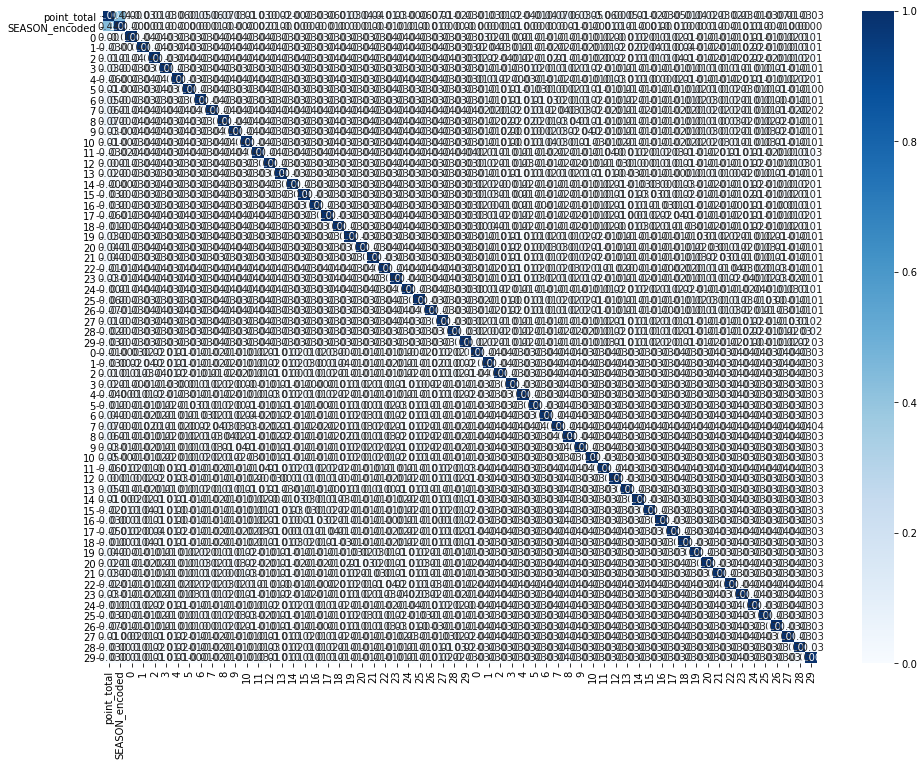

In [6]:
# Alot of these varriable are not needed do to the correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(X_full.corr(),
            cmap="Blues",annot=True, fmt='.2f', vmin=0);

In [6]:
# Columns that have high correlation 
cols_drop = ['cgp','losses','cgp_away',
             'losses_away',
            'avgpointtotal_home',
            "avgpointtotal_away","point_total"]

X_full = X_full.drop(cols_drop, axis=1)
#y = X_full["point_total"]

KeyError: "['point_total'] not found in axis"

In [7]:
# Tried only keeping values that have correlation with
 # target variable
corr_list = X[X.columns[1:]].apply(
    lambda x: x.corr(y))
cols = []
for col in corr_list.index:
    if (corr_list[col]>0.1 or corr_list[col] <-0.1):
        cols.append(col)
print(cols)

NameError: name 'X' is not defined

In [57]:
#dropping everything but cols
#adding the encoded team ids to the list,
#even though they are not correlated 
#cols.append("HOME_TEAM_ID_encoded")
#cols.append("VISITOR_TEAM_ID_encoded")
#cols.clear()
#cols.append("meanpointtotal")
#cols.append("SEASON_encoded")
#X = X[cols]
# tried dropping some of the correlated columns
#X = X.drop(columns=["avgpointtotal_home","avgpointtotal_away",
#                   "away_point_againts_average_last10",
#                     "point_againts_average_last10",])
#splitting the data 80-20


In [7]:
from sklearn.model_selection import train_test_split
# 90:10 split seems like the best option for testing
# Ideally we would do a leave-future-out method to best
# represent real world application of this model 

X_train, X_valid, y_train, y_valid = train_test_split(X_full, y, 
                            train_size=0.9, 
                            test_size=0.1, 
                            shuffle = False)

In [8]:
print(X_train.shape)
X_train["pt"]= y_train
X_train = X_train.loc[X_train["pt"]<242]
y_train = X_train["pt"]
X_train = X_train.drop(columns="pt")
print(X_train.shape)

(10723, 81)
(10035, 81)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
print(X_train.columns)

Index([             'point_average_last10',
            'point_againts_average_last10',
               'away_point_average_last10',
       'away_point_againts_average_last10',
                                     'cgp',
                                    'wins',
                                  'losses',
                              'winpercent',
                                'cgp_away',
                               'wins_away',
                             'losses_away',
                          'winpercen_away',
                       'hometeam-homewins',
                       'hometeam-awaywins',
                       'awayteam-homewins',
                       'awayteam-awaywins',
                      'avgpointtotal_home',
                      'avgpointtotal_away',
                          'meanpointtotal',
                                    'diff',
                                         0,
                                         1,
                                

In [9]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error

EN = ElasticNet().fit(X_train,y_train)

pred_EN = EN.predict(X_valid)
mae_EN = mean_absolute_error(pred_EN, y_valid)
print ("mae",mae_EN)

mae 15.10727920001428


In [10]:
from sklearn.linear_model import Lasso 

ls = Lasso().fit(X_train, y_train)

pred_ls = ls.predict(X_valid)
mae_ls = mean_absolute_error(pred_ls, y_valid)
print("mae",mae_ls)

mae 15.091268070795982


In [11]:
from sklearn.linear_model import Ridge

rg = Ridge().fit(X_train, y_train)

pred_rg = rg.predict(X_valid)
mae_rg = mean_absolute_error(pred_rg, y_valid)
print("mae",mae_rg)

mae 14.59016552058678


In [12]:
from sklearn.linear_model import TheilSenRegressor

ts = TheilSenRegressor().fit(X_train, y_train)
pred_ts = ts.predict(X_valid)
mae_ts = mean_absolute_error(pred_ts,y_valid)
print("mae",mae_ts)

mae 14.540678972479535


In [13]:
#lin reg 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score

lin = LinearRegression(normalize=True, ).fit(
    X_train,y_train
)

pred_lin = lin.predict(X_valid)
penis = []
for i in range(469):
    penis.append(221)

mae_lin = mean_absolute_error(pred_lin, y_valid)
score = lin.score(X_valid, y_valid, sample_weight=None)

print("score function",score)
print("mae", mae_lin)

score function 0.017087230159636535
mae 14.757288171140939


In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_train,y_train)

In [14]:
pred_rf = rf.predict(X_valid)
mae_rf = mean_absolute_error(pred_rf, y_valid)
print('mae', mae_rf)

mae 14.918909422605733


In [14]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=5000).fit(
    X_train, y_train
)

pred_mlp = regr.predict(X_valid)
mae_regr = mean_absolute_error(pred_mlp, y_valid)
print("mae",mae_regr)

mae 15.143569337475208


In [15]:
import xgboost as xgb

xg = xgb.XGBRegressor(
    booster="gblinear",
    feature_selector="shuffle",
    objective="reg:squaredlogerror",
    base_score=14,
    eval_metric="mae",
    ).fit(X_train,y_train)
pred_xg = xg.predict(X_valid)
xg_regr = mean_absolute_error(pred_xg, y_valid)
                         
print("mae",xg_regr)
print("done")


mae 14.525064660398751
done


In [17]:
results = {"Model": ["ElasticNet","LinearRegression",
                     "MLPRegression","XGBoost",
                     "Lasso","Ridge","TheilSen"],
          "MAE Score": [mae_EN,mae_lin,
                       mae_regr,xg_regr,mae_ls,
                       mae_rg,mae_ts]}
result_df = pd.DataFrame(data=results)
result_df = result_df.sort_values(by=["MAE Score"])
print(result_df.to_string(index=False))

            Model  MAE Score
          XGBoost  14.525065
         TheilSen  14.540679
            Ridge  14.590166
 LinearRegression  14.757288
            Lasso  15.091268
       ElasticNet  15.107279
    MLPRegression  15.143569


In [24]:
# Testing to see if my model is on average predicting
# higher or lower than the target (postive = high)
# 
ls = []
for i in range(len(pred_mlp)):
    ls.append(pred_ts[i] - y_valid.iloc[i])
    #print(x)
print (sum(ls))

1080.1187133139954


In [23]:
perm = PermutationImportance(
    xg, random_state=1
).fit(X_valid, y_valid)

eli5.show_weights(
    perm, feature_names = X_valid.columns.tolist()
)

eli5.show_weights(
    perm, feature_names = X_valid.columns.tolist()
)

AttributeError: 'int' object has no attribute 'startswith'